In [1]:
# !pip install catboost
# !pip install nb_black

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import sys

import catboost as cb

# wids_path = "/Users/diana/Documents/projects/widsdatathon2022"
wids_path = ".."
sys.path.append(wids_path)

from global_vars import all_feature_columns, response_column
import utils.model_utils as mu
from utils.data_utils import *
from utils.visualize import *
from utils.data_process_utils import *

pd.set_option("display.max_columns", 500)
sns.set_context("talk")

#### read in data
test_df = pd.read_csv(f"{wids_path}/data/test.csv")
print(f"Test dimension: {test_df.shape}")
train_df = pd.read_csv(f"{wids_path}/data/train.csv")
print(f"Train dimension: {train_df.shape}")
sample_solution_df = pd.read_csv(f"{wids_path}/data/sample_solution.csv")
print(f"Sample solution dimension: {sample_solution_df.shape}")
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

Test dimension: (9705, 63)
Train dimension: (75757, 64)
Sample solution dimension: (9705, 2)


<IPython.core.display.Javascript object>

In [10]:
feature_dict = {
    "compare_impute_log_temp_pca_onehot": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "compare_impute_log_temp_pca_onehot_impute": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {
            "energy_star_rating": ["state_factor", "building_class", "facility_type"]
        },
    },
    "compare_impute_log_temp_pca_onehot_xgb_impute": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    
}

<IPython.core.display.Javascript object>

Fitting PCA with 9 components
compare_impute_log_temp_pca_onehot ['cooling_degree_days', 'year_built', 'days_above_80f', 'direction_max_wind_speed', 'days_below_30f', 'snowdepth_inches', 'direction_peak_wind_speed', 'days_above_90f', 'elevation', 'precipitation_inches', 'days_below_20f', 'snowfall_inches', 'facility_type', 'days_above_110f', 'days_with_fog', 'energy_star_rating', 'heating_degree_days', 'max_wind_speed', 'days_above_100f', 'days_below_10f', 'state_factor', 'days_below_0f', 'building_class', 'temp_pca1', 'temp_pca2', 'temp_pca3', 'temp_pca4', 'temp_pca5', 'temp_pca6', 'temp_pca7', 'temp_pca8', 'temp_pca9', 'log10_floor_area'] True
Running catboost
Modeling 1...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 2...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 3...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 4...
Columns to be dummied: ['state_factor', 'buildin

,left_out_year,train_rmse,test_rmse
0,1,26.744205,53.760911
1,2,26.137865,42.697717
2,3,24.978563,45.763754
3,4,26.798939,38.189113
4,5,28.409042,34.154081
5,6,27.972685,45.234710


Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Whole data train RMSE: 26.967330297283844


,left_out_year,train_rmse,test_rmse,method
0,1.0,26.744205,53.760911,loyo
1,2.0,26.137865,42.697717,loyo
2,3.0,24.978563,45.763754,loyo
3,4.0,26.798939,38.189113,loyo
4,5.0,28.409042,34.154081,loyo
5,6.0,27.972685,45.234710,loyo
6,0.0,26.967330,NaN,whole train


/Users/hannahpu/opt/anaconda3/envs/general-project/lib/python3.7/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting PCA with 9 components
compare_impute_log_temp_pca_onehot_impute ['cooling_degree_days', 'direction_max_wind_speed', 'days_below_30f', 'snowdepth_inches', 'temp_pca5', 'temp_pca3', 'log10_floor_area', 'temp_pca1', 'temp_pca9', 'snowfall_inches', 'facility_type', 'heating_degree_days', 'state_factor', 'temp_pca7', 'temp_pca8', 'building_class', 'temp_pca6', 'year_built', 'days_above_80f', 'direction_peak_wind_speed', 'days_above_90f', 'elevation', 'precipitation_inches', 'days_below_20f', 'days_above_110f', 'temp_pca2', 'temp_pca4', 'days_with_fog', 'max_wind_speed', 'days_above_100f', 'days_below_10f', 'days_below_0f', 'backfilled_energy_star_rating'] True
Running catboost
Modeling 1...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 2...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 3...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 4...
Columns to be dummied: ['state

,left_out_year,train_rmse,test_rmse
0,1,26.935378,55.148288
1,2,26.065299,42.276606
2,3,25.426646,46.429024
3,4,27.167339,38.916241
4,5,28.631958,36.499960
5,6,27.969983,46.094737


Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Whole data train RMSE: 27.335048114557413


,left_out_year,train_rmse,test_rmse,method
0,1.0,26.935378,55.148288,loyo
1,2.0,26.065299,42.276606,loyo
2,3.0,25.426646,46.429024,loyo
3,4.0,27.167339,38.916241,loyo
4,5.0,28.631958,36.499960,loyo
5,6.0,27.969983,46.094737,loyo
6,0.0,27.335048,NaN,whole train


/Users/hannahpu/opt/anaconda3/envs/general-project/lib/python3.7/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting PCA with 9 components
compare_impute_log_temp_pca_onehot_xgb_impute ['cooling_degree_days', 'direction_max_wind_speed', 'days_below_30f', 'snowdepth_inches', 'temp_pca5', 'temp_pca3', 'log10_floor_area', 'temp_pca1', 'temp_pca9', 'snowfall_inches', 'facility_type', 'heating_degree_days', 'state_factor', 'temp_pca7', 'temp_pca8', 'building_class', 'temp_pca6', 'year_built', 'days_above_80f', 'direction_peak_wind_speed', 'days_above_90f', 'elevation', 'precipitation_inches', 'days_below_20f', 'days_above_110f', 'temp_pca2', 'temp_pca4', 'days_with_fog', 'max_wind_speed', 'days_above_100f', 'days_below_10f', 'days_below_0f', 'backfilled_energy_star_rating'] True
Running catboost
Modeling 1...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 2...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 3...
Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Modeling 4...
Columns to be dummied: ['s

,left_out_year,train_rmse,test_rmse
0,1,26.390100,56.091118
1,2,25.727123,43.316155
2,3,24.560952,47.882788
3,4,26.380919,39.068017
4,5,27.889636,36.558921
5,6,27.645121,46.433316


Columns to be dummied: ['state_factor', 'building_class', 'facility_type']
Whole data train RMSE: 26.700190814417944


,left_out_year,train_rmse,test_rmse,method
0,1.0,26.390100,56.091118,loyo
1,2.0,25.727123,43.316155,loyo
2,3.0,24.560952,47.882788,loyo
3,4.0,26.380919,39.068017,loyo
4,5.0,27.889636,36.558921,loyo
5,6.0,27.645121,46.433316,loyo
6,0.0,26.700191,NaN,whole train


/Users/hannahpu/opt/anaconda3/envs/general-project/lib/python3.7/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


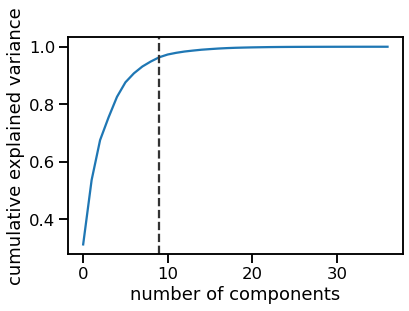

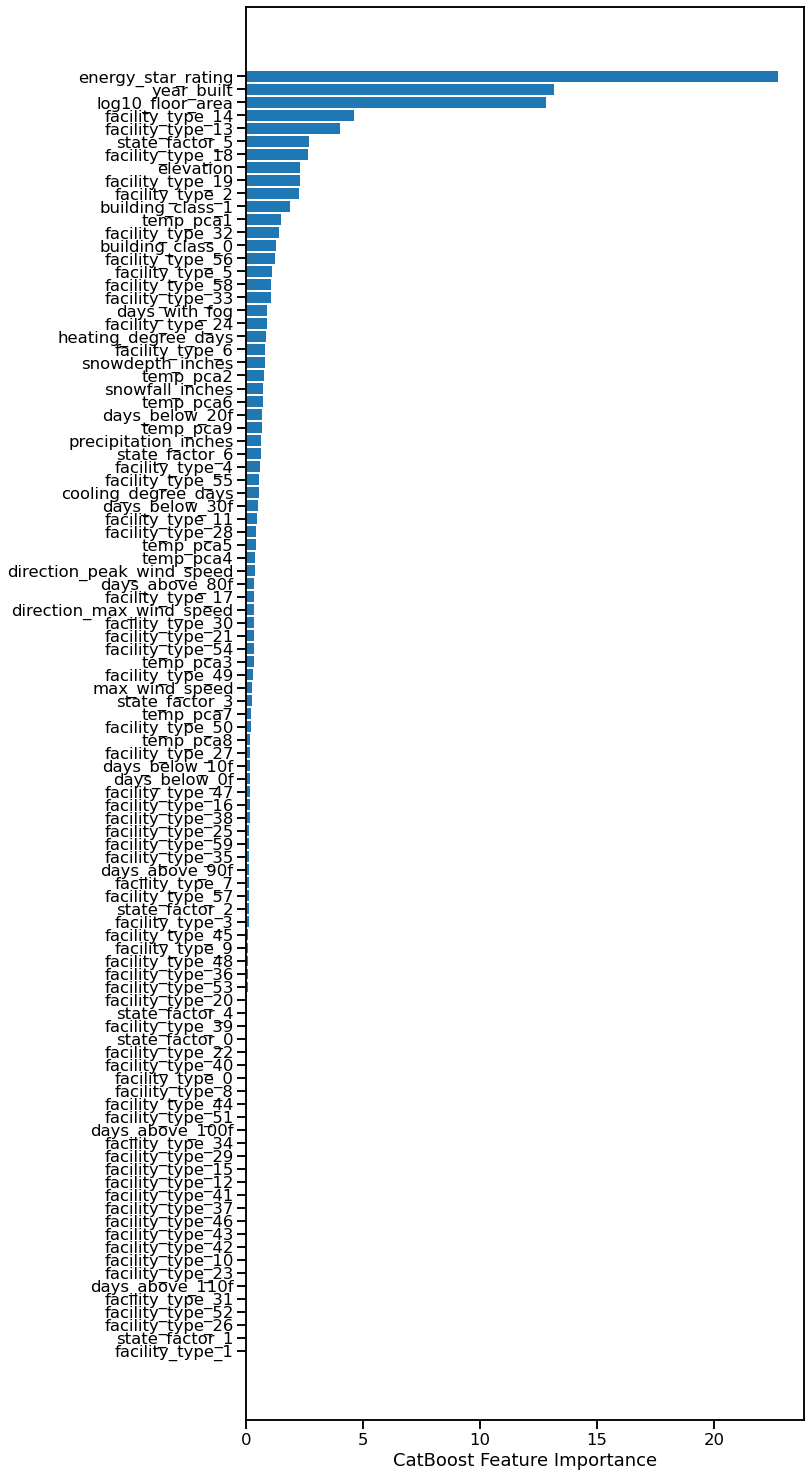

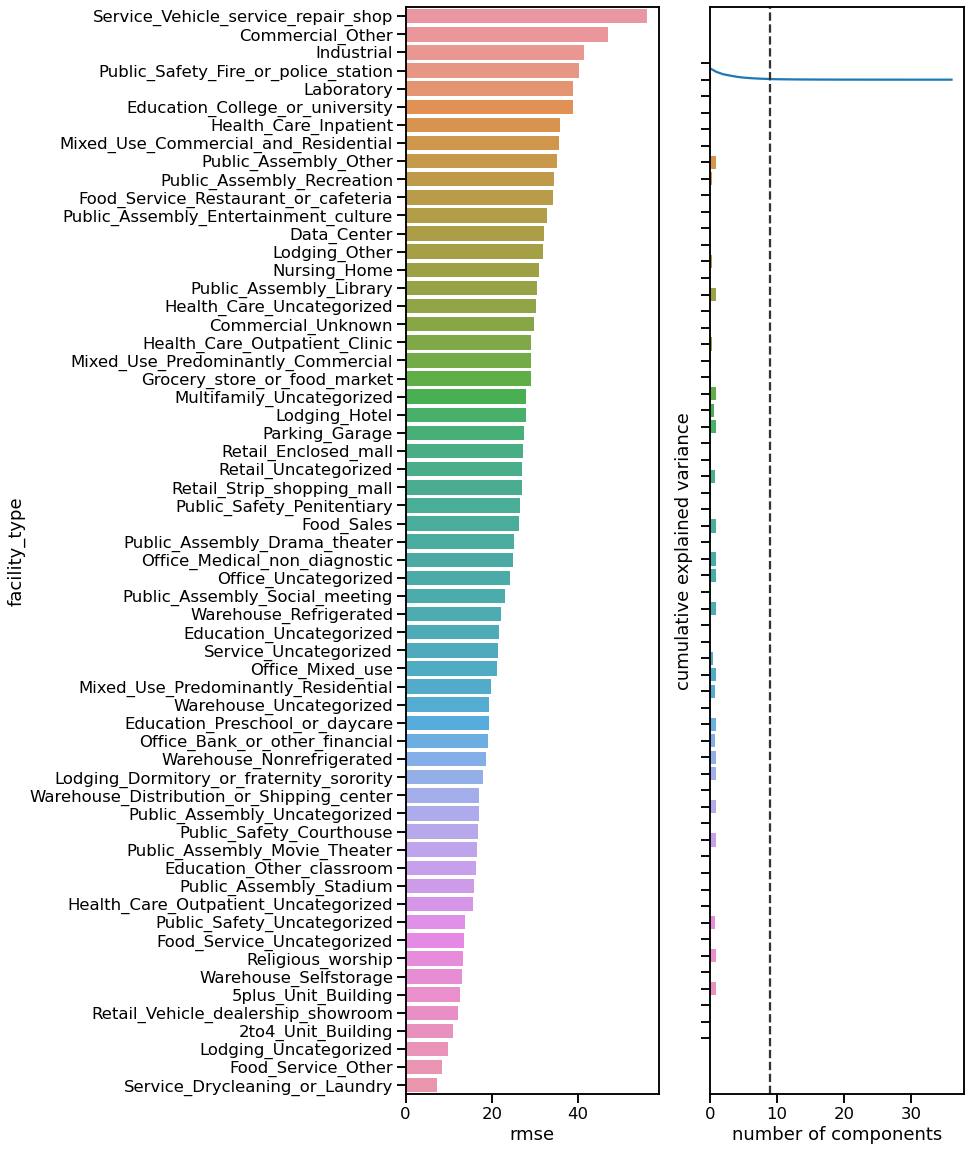

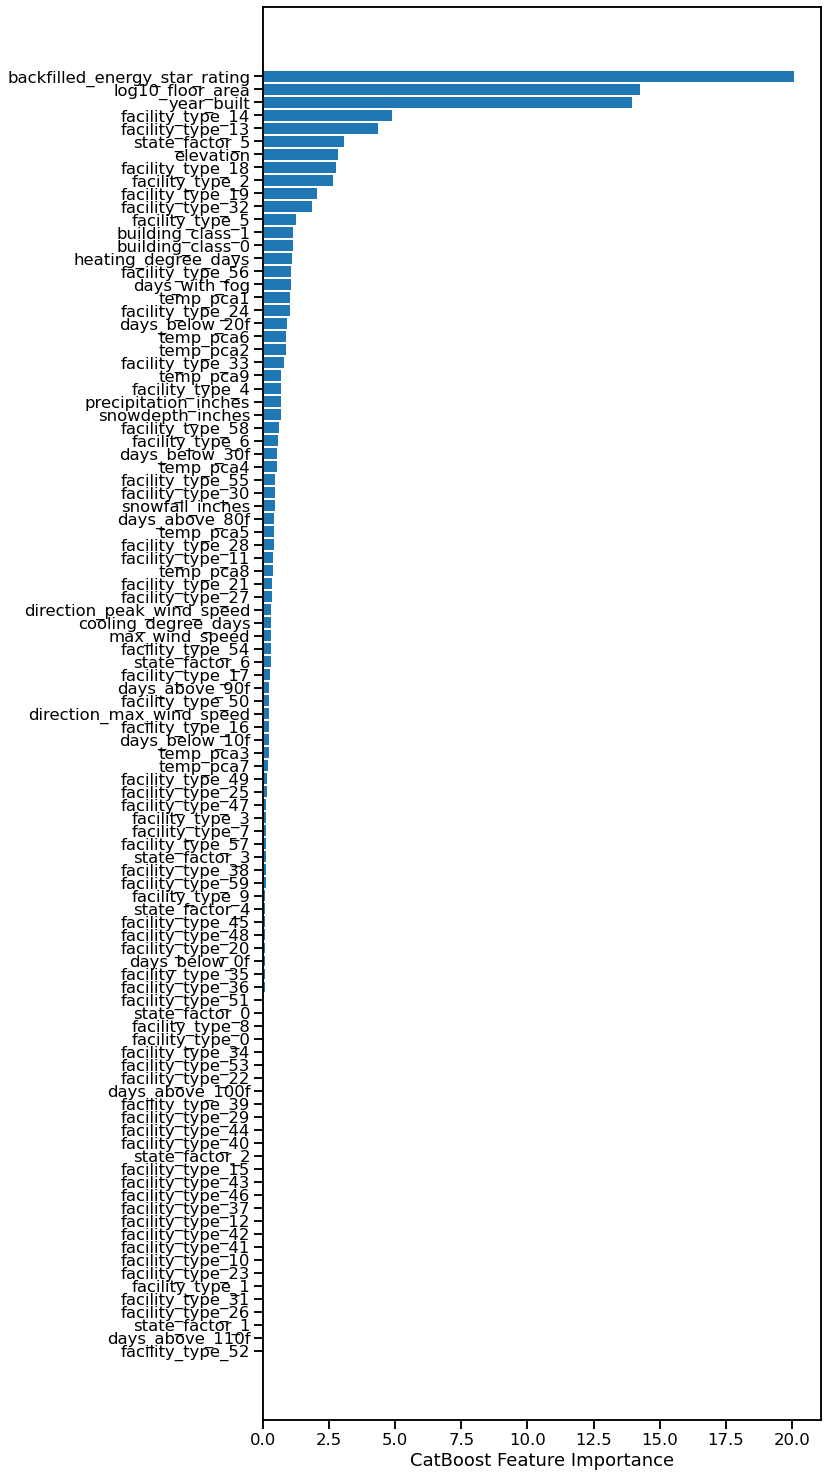

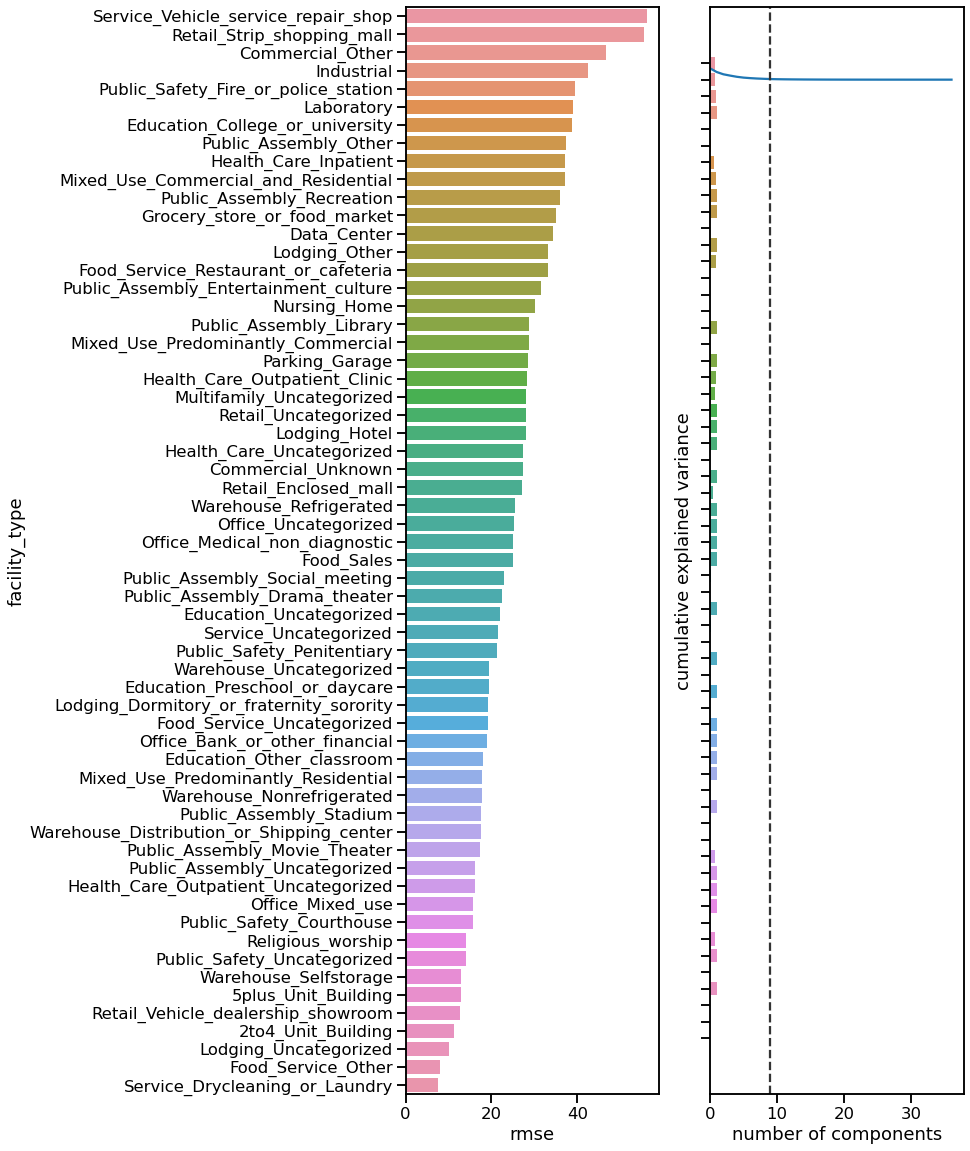

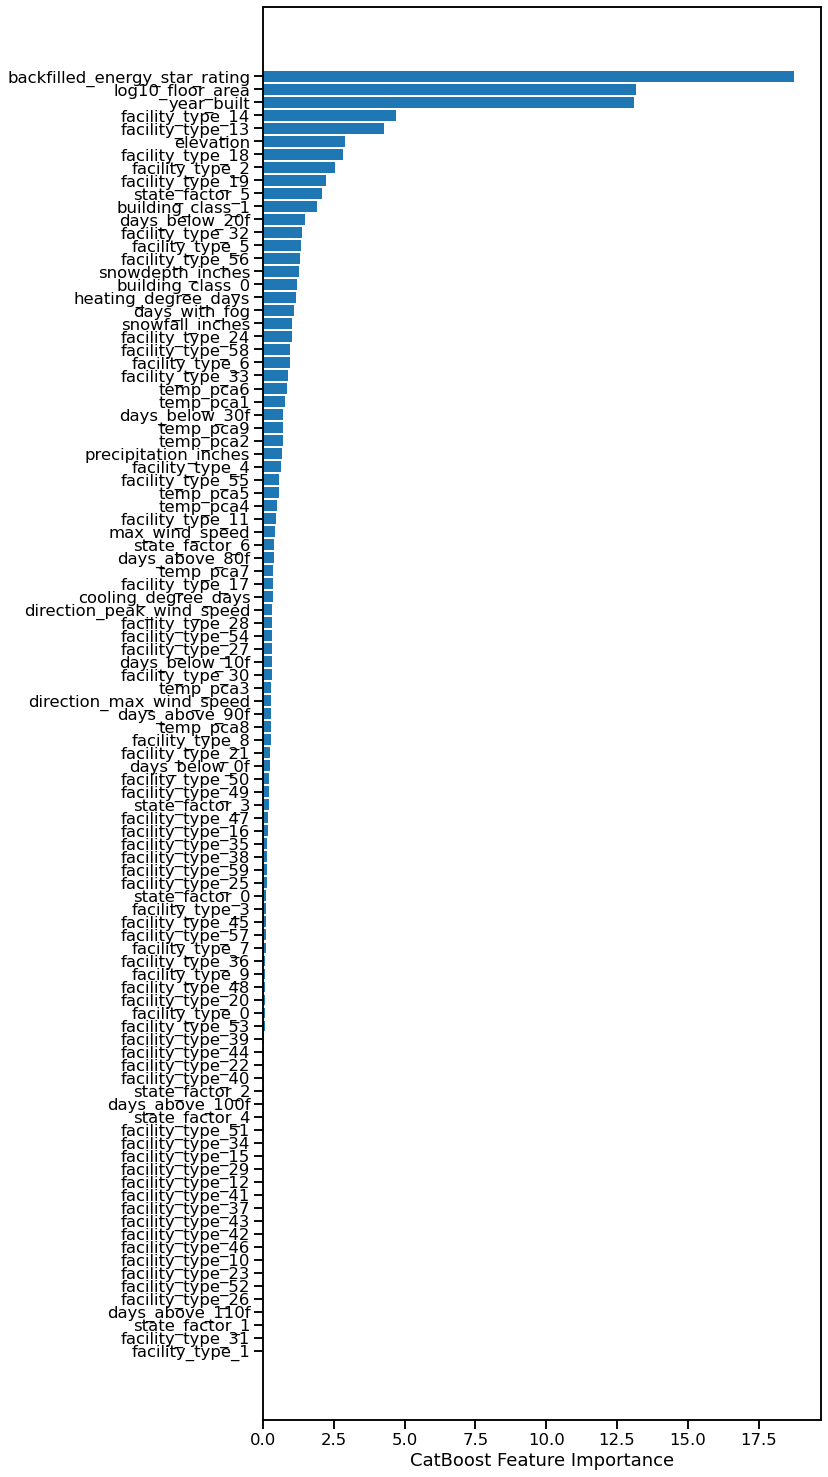

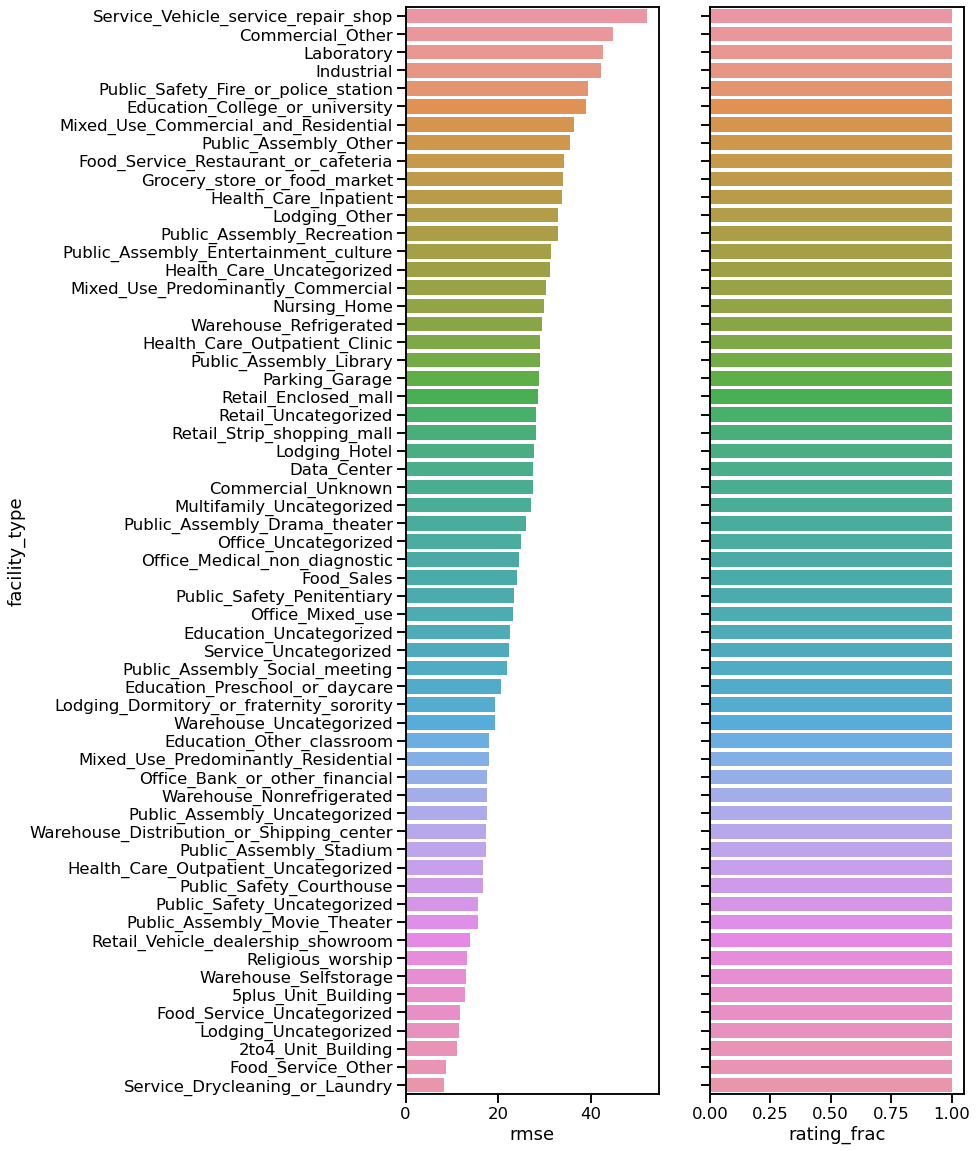

<IPython.core.display.Javascript object>

In [11]:
for config_name in list(feature_dict.keys()):
    cols_to_reduce = feature_dict[config_name]["cols_to_reduce"]
    log10_transform_cols = feature_dict[config_name]["log10_transform_cols"]
    backfill_dict = feature_dict[config_name]["backfill_dict"]
    if_scale = False
    if_one_hot = feature_dict[config_name]["if_one_hot"]

    train_filter_df, test_filter_df, pca_cols = process_data(
        train_df.drop_duplicates(),
        test_df.drop_duplicates(),
        cols_to_reduce,
        log10_transform_cols,
        0,
        backfill_dict,
    )
    if config_name == "compare_impute_log_temp_pca_onehot_xgb_impute":
        predicted_impute_df = pd.read_csv(f"{wids_path}/feature_impute_data/energy_star_rating_by_year_non_weather_onehot_xgb_test_prediction.csv")
        train_filter_df = train_filter_df.merge(
            predicted_impute_df[["id", "predict_energy_star_rating"]], on = "id", how = "left"
        )
        train_filter_df["backfilled_energy_star_rating"] = train_filter_df["energy_star_rating"].fillna(
            train_filter_df["predict_energy_star_rating"]
            )
        test_filter_df = test_filter_df.merge(
            predicted_impute_df[["id", "predict_energy_star_rating"]], on = "id", how = "left"
        )
        test_filter_df["backfilled_energy_star_rating"] = test_filter_df["energy_star_rating"].fillna(
            test_filter_df["predict_energy_star_rating"]
            )
    # Set feature columns after data transformations
    features_columns = (
        list(set(all_feature_columns) - set(cols_to_reduce) - set(log10_transform_cols))
        + pca_cols
        + [f"log10_{col}" for col in log10_transform_cols]
    )
    if backfill_dict:
        backfill_cols = list(backfill_dict.keys())
        features_columns = list(set(features_columns) - set(backfill_cols)) + [
            f"backfilled_{col}" for col in backfill_cols
        ]
    if config_name == "compare_impute_log_temp_pca_onehot_xgb_impute":
        backfill_cols = ["energy_star_rating"]
        features_columns = list(set(features_columns) - set(backfill_cols)) + [
            f"backfilled_{col}" for col in backfill_cols
        ]
    print(config_name, features_columns, if_one_hot)

    # run model
    seed = 9
    depth = 12
    model = cb.CatBoostRegressor(
                loss_function="RMSE",
                depth=depth,
                random_seed=seed,
                verbose=False,
                nan_mode="Min",
            )
    ## Run LOY model
    catboost_rmse = mu.run_leave_year_out(
        model_df=train_filter_df,
        ml_model=model,
        features_columns=features_columns,
        if_scale_data=if_scale,
        if_one_hot=if_one_hot,
        model_type="catboost",
    )
    print(f"Average RMSE:\n{catboost_rmse.mean()}")
    display(catboost_rmse)

    ## predict on test data
    train_filter_x_df, train_filter_y_df = mu.split_model_feature_response(
        train_filter_df, features_columns
    )
    test_filter_x_df = mu.split_model_feature_response(
        test_filter_df, features_columns, if_with_response=False
    )
    processed_train_x_df, processed_test_x_df = mu.process_train_test_data(
        train_filter_x_df, test_filter_x_df, if_scale, if_one_hot, full_data_df = train_filter_x_df
    )

    train_predict, test_predict, fitted_model = mu.run_catboost_model(
        model, processed_train_x_df, train_filter_y_df, processed_test_x_df
    )
    training_rmse = mu.calculate_rmse(train_filter_y_df, train_predict)
    print(f"Whole data train RMSE: {training_rmse}")

    ## output save result
    catboost_rmse.loc[catboost_rmse.shape[0], :] = [0, training_rmse, np.nan]
    catboost_rmse["method"] = catboost_rmse["left_out_year"].apply(
        lambda x: "loyo" if x > 0 else "whole train"
    )
    display(catboost_rmse)
    catboost_rmse.to_csv(
        f"{wids_path}/validation_result/hannah/{config_name}_depth{depth}_seed{seed}.csv", index=False
    )

    test_prediction_result = test_df[["id"]]
    test_prediction_result["site_eui"] = test_predict
    test_prediction_result.to_csv(
        f"{wids_path}/prediction_result/hannah/{config_name}_depth{depth}_seed{seed}.csv", index=False
    )
    plot_catboost_feature_importance(model)
    plt.savefig(
        f"{wids_path}/validation_result/hannah/{config_name}_feature_importance_depth{depth}_seed{seed}.png"
    )

    rmse_df = get_rmse_by_group(
        train_filter_x_df.rename(
            columns={"backfilled_energy_star_rating": "energy_star_rating"}
        ),
        train_filter_y_df,
        train_predict,
    )
    plot_rmse_by_group(rmse_df)
    plt.savefig(
        f"{wids_path}/validation_result/hannah/{config_name}_rmse_by_group_depth{depth}_seed{seed}.png"
    )
